# Análisis de sentimiento de secuencias en Keras usando RNNs
    
   Vamos a ver un ejemplo de **secuencia a valor** de aplicación de LSTMs. Este consiste en clasificar las críticas de IMDB.
   

    
### Cargamos el dataset imdb",
    
`Keras` incorpora una utilidad de acceso a este data-set https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

In [1]:
import numpy as np
import keras as kr
import tensorflow as tf
# tf.python.control_flow_ops = tf #esta línea evita un conflicto entre Kera y Tensorflow

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

np.random.seed(0)

Using TensorFlow backend.


In [2]:
kr.__version__

'2.0.9'

        ?imdb.load_data()

        imdb.load_data(path='imdb_full.pkl', nb_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3)
        Docstring:
        Loads IMDB dataset.

        # Arguments
            path: where to store the data (in `/.keras/dataset`)
            nb_words: max number of words to include. Words are ranked
                by how often they occur (in the training set) and only
                the most frequent words are kept
            skip_top: skip the top N most frequently occuring words
                (which may not be informative).
            maxlen: truncate sequences after this length.
            seed: random seed for sample shuffling.
            start_char: The start of a sequence will be marked with this character.
                Set to 1 because 0 is usually the padding character.
            oov_char: words that were cut out because of the `nb_words`
                or `skip_top` limit will be replaced with this character.
            index_from: index actual words with this index and higher.

        Note that the 'out of vocabulary' character is only used for
        words that were present in the training set but are not included
        because they're not making the `nb_words` cut here.
        Words that were not seen in the trining set but are in the test set
        have simply been skipped.

In [3]:
top_words = 5000
max_len=500
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb_full.pkl",
                                                         nb_words=top_words, #usamos 1000 palabras más frecuentes",
                                                          skip_top=0,
                                                          maxlen=max_len, #tomamos secuencias de hasta 500 palabras",
                                                          seed=113,
                                                          start_char=1,
                                                          oov_char=2,
                                                         index_from=3)

/home/infinitemonkeys/anaconda3/lib/python3.5/site-packages/keras/datasets/imdb.py:45: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Elegimos usar las 1000 palabras más frecuentes y secuencias de longitud 500.

X_train,X_test son arrays formados por listas de longitud hasta 500, hay 25000 listas

In [5]:
long_crit=np.array([len(X_train[k]) for k in range(X_train.shape[0])])
np.max(long_crit)

499

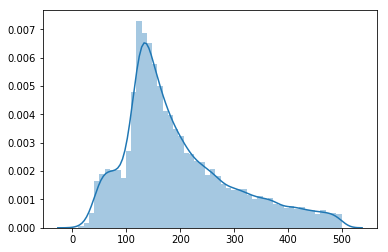

In [6]:
import seaborn as sns
%matplotlib inline

sns.distplot(long_crit);

Usando el preprocesamiento de keras completamos las secuencias con valores irrelevantes introducidos previamente  (0 es el símbolo elegido), hasta que todas tienen longitud 500.

In [7]:
X_train = sequence.pad_sequences(X_train, padding='pre',maxlen=max_len)
X_test = sequence.pad_sequences(X_test, padding='pre',maxlen=max_len)

In [8]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1, 4078,    2,    9,  448,
        725,    4,    2,  241,    2,  241,   38,  111,    2,  500,   40,
         91,  374,  500,  679,  102,   13,   62,  135,    4, 2159,   92,
          2,   83,    6,  275, 3449,   66,   73,    5,   15,  271,   18,
         14,   31,   99, 2149,   10,   10,  225,    6,  184,  196,    2,
         63, 2568,    5,  732,    4,  863,   18,    4,   65,    5,    4,
       1397, 1111,   23,   63,    6,  564, 4892,   

### Aplicamos LSTM

Vamos a generar ahora una LSTM con dos capas:
   - `Embedding` - Es la capa que transforma los índices enteros en vectores densos de longitud 32 para que las capas posteriores puedan procesarlos.
   - `LSTM` - Es la capa que trabaja en la clasificación. Ponemos 200 neuronas.
   - Una única neurona de salida con un sigmoide ya que estamos ante una clasificación 0-1 (crítica positiva, crítica negativa)

In [9]:
embedding_vector_length=32

def modelLSTM(n_lstm):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=max_len))
    model.add(LSTM(n_lstm))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
rnn=modelLSTM(100)

In [11]:
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [12]:
#entrenamos el modelo
rnn.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)

/home/infinitemonkeys/anaconda3/lib/python3.5/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 20947 samples
Epoch 1/3
25000/25000 [==============================] - 156s 6ms/step - loss: 0.4467 - acc: 0.7904 - val_loss: 0.3506 - val_acc: 0.8508
Epoch 2/3
25000/25000 [==============================] - 155s 6ms/step - loss: 0.3162 - acc: 0.8694 - val_loss: 0.3167 - val_acc: 0.8714
Epoch 3/3
25000/25000 [==============================] - 157s 6ms/step - loss: 0.2475 - acc: 0.9032 - val_loss: 0.3024 - val_acc: 0.8722


In [15]:
scores = rnn.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

20947/20947 [==============================] - 47s 2ms/step
Accuracy: 87.22%


Con la primera prueba usando LSTM nos ubicamos en una precisión del 86.67% en el dataset, del artículo https://cs224d.stanford.edu/reports/HongJames.pdf sabemos que precisiones desarrolladas son

<img src='imdbresults.png'>

# GRU

In [38]:
?GRU

In [34]:
def modelGRU(n_gru):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=max_len))
    model.add(GRU(n_gru))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
rnnGRU=modelGRU(100)
rnnGRU.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_4 (Embedding)          (None, 500, 32)       160000      embedding_input_4[0][0]          
____________________________________________________________________________________________________
gru_1 (GRU)                      (None, 100)           39900       embedding_4[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             101         gru_1[0][0]                      
Total params: 200,001
Trainable params: 200,001
Non-trainable params: 0
____________________________________________________________________________________________________


In [36]:
#entrenamos el modelo
rnnGRU.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)

Train on 25000 samples, validate on 20947 samples
Epoch 1/3
25000/25000 [==============================] - 157s - loss: 0.4505 - acc: 0.7787 - val_loss: 0.3389 - val_acc: 0.8549
Epoch 2/3
25000/25000 [==============================] - 157s - loss: 0.2878 - acc: 0.8832 - val_loss: 0.3074 - val_acc: 0.8739
Epoch 3/3
25000/25000 [==============================] - 156s - loss: 0.2503 - acc: 0.9020 - val_loss: 0.3231 - val_acc: 0.8775


In [14]:
scores = rnnGRU.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: name 'rnnGRU' is not defined

### GRU regularizado con dropout

Usando celdas GRU hemos tardado menos y hemos mejorado ligeramente la precisión. Vamos a probar una versión regularizada del algoritmo con más epochs y neuronas para observar si mejora la precisión:

In [40]:
def modelGRUdrop(n_gru,p_drop_W,p_drop_U):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=max_len))
    model.add(GRU(n_gru,dropout_W=p_drop_W,dropout_U=p_drop_U))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
rnnGRUdrop=modelGRUdrop(200,0.1,0.1)

In [46]:
#entrenamos el modelo
rnnGRUdrop.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)

Train on 25000 samples, validate on 20947 samples
Epoch 1/3
25000/25000 [==============================] - 174s - loss: 0.5104 - acc: 0.7394 - val_loss: 0.4096 - val_acc: 0.8169
Epoch 2/3
25000/25000 [==============================] - 173s - loss: 0.3730 - acc: 0.8413 - val_loss: 0.3544 - val_acc: 0.8564
Epoch 3/3
25000/25000 [==============================] - 173s - loss: 0.2897 - acc: 0.8849 - val_loss: 0.2885 - val_acc: 0.8845


In [47]:
scores = rnnGRUdrop.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

20947/20947 [==============================] - 68s    
Accuracy: 88.45%


La regularización ha mejorado la precisión

In [8]:
def modelGRUdrop2(n_gru,n_dense,p_drop_W,p_drop_U):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=max_len))
    model.add(GRU(n_gru,dropout_W=p_drop_W,dropout_U=p_drop_U))
    model.add(Dense(n_dense, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
rnnGRUdrop = modelGRUdrop2(200,200,0.1,0.1)

In [13]:
rnnGRUdrop.fit(X_train, y_train, validation_data=(X_test, y_test), 
               nb_epoch=5, batch_size=64)

Train on 25000 samples, validate on 20947 samples
Epoch 1/5
25000/25000 [==============================] - 164s - loss: 0.5014 - acc: 0.7514 - val_loss: 0.3890 - val_acc: 0.8248
Epoch 2/5
25000/25000 [==============================] - 162s - loss: 0.3597 - acc: 0.8442 - val_loss: 0.4549 - val_acc: 0.7809
Epoch 3/5
25000/25000 [==============================] - 161s - loss: 0.2682 - acc: 0.8923 - val_loss: 0.3090 - val_acc: 0.8704
Epoch 4/5
25000/25000 [==============================] - 161s - loss: 0.2017 - acc: 0.9208 - val_loss: 0.2826 - val_acc: 0.8854
Epoch 5/5
25000/25000 [==============================] - 161s - loss: 0.1548 - acc: 0.9405 - val_loss: 0.3029 - val_acc: 0.8906


In [14]:
scores = rnnGRUdrop.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

20947/20947 [==============================] - 62s    
Accuracy: 89.06%
